# Creating the Training and Testing Data for Kickstarter Projects

In this notebook I will further clean the data to ready it for machine learning. Specifically, I will:

- split datetime columns
- convert categorical data to dummy variables
- add dummy dfs to the rest of the dataset
- remove categorical columns that have dummy duplicates
- separate new df into training (80%) and testing (20%) data

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore')
print('done')

done


In [2]:
#import csv of cleaned data
df = pd.read_csv('kickstarterClean.csv')
df.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,rate
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 00:00:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58,0
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01 00:00:00,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59,0
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:00:00,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44,0
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 00:00:00,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29,0
4,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 00:00:00,19500.0,2015-07-04 08:35:03,1283.0,failed,14,US,1283.0,1283.0,19500.00,55,0


In [3]:
#drop columns: double-index, ID, name, sub-category, usd pledged (repeat)
df1 = df[['main_category', 'country', 'currency', 'goal', 'usd_goal_real', 'backers', 'pledged', 'usd_pledged_real', 'launched', 'deadline', 'duration', 'rate']]
df1.head()

,main_category,country,currency,goal,usd_goal_real,backers,pledged,usd_pledged_real,launched,deadline,duration,rate
0,Publishing,GB,GBP,1000.0,1533.95,0,0.0,0.0,2015-08-11 12:12:28,2015-10-09 00:00:00,58,0
1,Film & Video,US,USD,30000.0,30000.00,15,2421.0,2421.0,2017-09-02 04:43:57,2017-11-01 00:00:00,59,0
2,Film & Video,US,USD,45000.0,45000.00,3,220.0,220.0,2013-01-12 00:20:50,2013-02-26 00:00:00,44,0
3,Music,US,USD,5000.0,5000.00,1,1.0,1.0,2012-03-17 03:24:11,2012-04-16 00:00:00,29,0
4,Film & Video,US,USD,19500.0,19500.00,14,1283.0,1283.0,2015-07-04 08:35:03,2015-08-29 00:00:00,55,0


In [4]:
#ensure date columns are in datetime format
df1['launched'] = pd.to_datetime(df1['launched'])
df1['deadline'] = pd.to_datetime(df1['deadline'])

#add new columns of separated launch dates
df1['launchyear'] = df1['launched'].dt.year
df1['launchmonth'] = df1['launched'].dt.month
df1['launchday'] = df1['launched'].dt.day
df1.head()

,main_category,country,currency,goal,usd_goal_real,backers,pledged,usd_pledged_real,launched,deadline,duration,rate,launchyear,launchmonth,launchday
0,Publishing,GB,GBP,1000.0,1533.95,0,0.0,0.0,2015-08-11 12:12:28,2015-10-09,58,0,2015,8,11
1,Film & Video,US,USD,30000.0,30000.00,15,2421.0,2421.0,2017-09-02 04:43:57,2017-11-01,59,0,2017,9,2
2,Film & Video,US,USD,45000.0,45000.00,3,220.0,220.0,2013-01-12 00:20:50,2013-02-26,44,0,2013,1,12
3,Music,US,USD,5000.0,5000.00,1,1.0,1.0,2012-03-17 03:24:11,2012-04-16,29,0,2012,3,17
4,Film & Video,US,USD,19500.0,19500.00,14,1283.0,1283.0,2015-07-04 08:35:03,2015-08-29,55,0,2015,7,4


In [5]:
##add new columns of separated deadlines 
df1['deadlineyear'] = df1['deadline'].dt.year
df1['deadlinemonth'] = df1['deadline'].dt.month
df1['deadlineday'] = df1['deadline'].dt.day
df1.head()

,main_category,country,currency,goal,usd_goal_real,backers,pledged,usd_pledged_real,launched,deadline,duration,rate,launchyear,launchmonth,launchday,deadlineyear,deadlinemonth,deadlineday
0,Publishing,GB,GBP,1000.0,1533.95,0,0.0,0.0,2015-08-11 12:12:28,2015-10-09,58,0,2015,8,11,2015,10,9
1,Film & Video,US,USD,30000.0,30000.00,15,2421.0,2421.0,2017-09-02 04:43:57,2017-11-01,59,0,2017,9,2,2017,11,1
2,Film & Video,US,USD,45000.0,45000.00,3,220.0,220.0,2013-01-12 00:20:50,2013-02-26,44,0,2013,1,12,2013,2,26
3,Music,US,USD,5000.0,5000.00,1,1.0,1.0,2012-03-17 03:24:11,2012-04-16,29,0,2012,3,17,2012,4,16
4,Film & Video,US,USD,19500.0,19500.00,14,1283.0,1283.0,2015-07-04 08:35:03,2015-08-29,55,0,2015,7,4,2015,8,29


In [6]:
#drop the original date columns
df2 = df1[['main_category', 'country', 'currency', 'goal', 'usd_goal_real', 
           'backers', 'pledged', 'usd_pledged_real', 'launchyear', 'launchmonth', 
           'launchday', 'deadlineyear', 'deadlinemonth', 'deadlineday', 'duration', 'rate']]
df2.head()

,main_category,country,currency,goal,usd_goal_real,backers,pledged,usd_pledged_real,launchyear,launchmonth,launchday,deadlineyear,deadlinemonth,deadlineday,duration,rate
0,Publishing,GB,GBP,1000.0,1533.95,0,0.0,0.0,2015,8,11,2015,10,9,58,0
1,Film & Video,US,USD,30000.0,30000.00,15,2421.0,2421.0,2017,9,2,2017,11,1,59,0
2,Film & Video,US,USD,45000.0,45000.00,3,220.0,220.0,2013,1,12,2013,2,26,44,0
3,Music,US,USD,5000.0,5000.00,1,1.0,1.0,2012,3,17,2012,4,16,29,0
4,Film & Video,US,USD,19500.0,19500.00,14,1283.0,1283.0,2015,7,4,2015,8,29,55,0


In [7]:
#create dummies for main_category, country, currency (categorical data)
dummy1 = pd.get_dummies(df2[['main_category', 'country', 'currency']], drop_first=True) 
dummy1.head()

,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
#add dummies to the original dataframe
dummy_df = pd.concat([df2, dummy1], axis=1)
dummy_df.head()

,main_category,country,currency,goal,usd_goal_real,backers,pledged,usd_pledged_real,launchyear,launchmonth,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,Publishing,GB,GBP,1000.0,1533.95,0,0.0,0.0,2015,8,...,0,1,0,0,0,0,0,0,0,0
1,Film & Video,US,USD,30000.0,30000.00,15,2421.0,2421.0,2017,9,...,0,0,0,0,0,0,0,0,0,1
2,Film & Video,US,USD,45000.0,45000.00,3,220.0,220.0,2013,1,...,0,0,0,0,0,0,0,0,0,1
3,Music,US,USD,5000.0,5000.00,1,1.0,1.0,2012,3,...,0,0,0,0,0,0,0,0,0,1
4,Film & Video,US,USD,19500.0,19500.00,14,1283.0,1283.0,2015,7,...,0,0,0,0,0,0,0,0,0,1


In [9]:
#drop the columns with the categorical data
dummy_final = dummy_df.drop(['main_category', 'country', 'currency'], axis=1)
dummy_final.head()

,goal,usd_goal_real,backers,pledged,usd_pledged_real,launchyear,launchmonth,launchday,deadlineyear,deadlinemonth,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1000.0,1533.95,0,0.0,0.0,2015,8,11,2015,10,...,0,1,0,0,0,0,0,0,0,0
1,30000.0,30000.00,15,2421.0,2421.0,2017,9,2,2017,11,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,45000.00,3,220.0,220.0,2013,1,12,2013,2,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,5000.00,1,1.0,1.0,2012,3,17,2012,4,...,0,0,0,0,0,0,0,0,0,1
4,19500.0,19500.00,14,1283.0,1283.0,2015,7,4,2015,8,...,0,0,0,0,0,0,0,0,0,1


In [10]:
#set variables for splitting the data


X = dummy_final.drop(['pledged', 'usd_pledged_real', 'rate'], axis=1)
y_classification = dummy_final['rate']
y_regression = dummy_final['usd_pledged_real']
X['extra_column'] = 1
#print('done')
X.head()

,goal,usd_goal_real,backers,launchyear,launchmonth,launchday,deadlineyear,deadlinemonth,deadlineday,duration,...,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,extra_column
0,1000.0,1533.95,0,2015,8,11,2015,10,9,58,...,1,0,0,0,0,0,0,0,0,1
1,30000.0,30000.00,15,2017,9,2,2017,11,1,59,...,0,0,0,0,0,0,0,0,1,1
2,45000.0,45000.00,3,2013,1,12,2013,2,26,44,...,0,0,0,0,0,0,0,0,1,1
3,5000.0,5000.00,1,2012,3,17,2012,4,16,29,...,0,0,0,0,0,0,0,0,1,1
4,19500.0,19500.00,14,2015,7,4,2015,8,29,55,...,0,0,0,0,0,0,0,0,1,1


In [11]:

# corrMatrix = X.corr()
# plt.figure(figsize=(30,25))
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

In [12]:
# from pandas.plotting import scatter_matrix

# scatterMatrix = X[['backers', 'usd_goal_real', 'launchyear', 'launchmonth', 'launchday', 'deadlineyear', 'deadlinemonth', 
#                  'deadlineday', 'duration', 'main_category_Comics', 'main_category_Dance', 'main_category_Design', 
#                  'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 
#                  'main_category_Journalism', 'main_category_Music', 'main_category_Photography', 
#                  'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'country_AU', 
#                  'country_BE', 'country_CA', 'country_CH', 'country_DE', 'country_ES', 'country_GB', 'country_HK', 
#                  'country_IE', 'country_IT', 'country_MX', 'country_NL', 'country_NO', 'country_NZ', 'country_SE', 
#                  'extra_column']].corr()
# plt.figure(figsize=(30,25))
# scatter_matrix(scatterMatrix, alpha=0.5)
# plt.show()


# Machine Learning

## Logistic Regression

### Logistic Regression with default parameters

In [13]:
#import for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
print('done')

done


In [14]:


# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

#instantiate the classifier
logreg1 = LogisticRegression()

# Fit the model on the training data.
%time logreg1.fit(X_train, y_train)

# accuracy score for training
train_accuracy = logreg1.score(X_train, y_train)

# accuracy score for test set
test_accuracy = logreg1.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 4.9 s, sys: 205 ms, total: 5.11 s
Wall time: 4.84 s
Training set score is 0.8879914798402134
Test set score is 0.8867521367521367


In [15]:
#confusion matrix for default model

from sklearn.metrics import confusion_matrix

y_pred1 = logreg1.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[45720  1713]
 [ 6714 20265]]


In [16]:
#statsmodels table
logreg_model = sm.Logit(y_train, X_train)
%time result = logreg_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 13
CPU times: user 4.55 s, sys: 871 ms, total: 5.42 s
Wall time: 2.87 s
                           Logit Regression Results                           
Dep. Variable:                   rate   No. Observations:               297647
Model:                          Logit   Df Residuals:                   297601
Method:                           MLE   Df Model:                           45
Date:                Thu, 14 May 2020   Pseudo R-squ.:                    -inf
Time:                        14:35:50   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                   -1.9433e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
goal       

In [17]:
#statsmodels table with only  columns with p-value<0.05
logreg_model = sm.Logit(y_train, X_train[['usd_goal_real', 'backers', 'launchyear', 'launchmonth', 'launchday',
                                         'deadlineyear', 'deadlinemonth', 'deadlineday', 'duration', 
                                          'main_category_Comics', 'main_category_Crafts', 'main_category_Dance',
                                         'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video',
                                         'main_category_Food', 'main_category_Games', 'main_category_Journalism',
                                         'main_category_Music', 'main_category_Photography', 'main_category_Publishing',
                                         'main_category_Technology', 'main_category_Theater', 'country_AU', 'country_FR',
                                         'currency_EUR']])
%time result = logreg_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 14
CPU times: user 1.49 s, sys: 110 ms, total: 1.6 s
Wall time: 803 ms
                           Logit Regression Results                           
Dep. Variable:                   rate   No. Observations:               297647
Model:                          Logit   Df Residuals:                   297621
Method:                           MLE   Df Model:                           25
Date:                Thu, 14 May 2020   Pseudo R-squ.:                    -inf
Time:                        14:35:52   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                   -1.9433e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
usd_goal_rea

In [18]:
#statsmodels table with only columns where p-value>0.05
X_diff = X_train.drop(['usd_goal_real', 'backers', 'launchyear', 'launchmonth', 'launchday', 'deadlineyear', 
                       'deadlinemonth', 'deadlineday', 'duration', 'main_category_Comics', 'main_category_Crafts', 
                       'main_category_Dance', 'main_category_Design', 'main_category_Fashion',
                       'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 
                       'main_category_Journalism', 'main_category_Music', 'main_category_Photography', 
                       'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'country_AU', 
                       'country_FR','currency_EUR'], axis=1)
logreg_model1 = sm.Logit(y_train, X_diff)
%time result = logreg_model1.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.628544
         Iterations 10
CPU times: user 1.29 s, sys: 80.6 ms, total: 1.37 s
Wall time: 685 ms
                           Logit Regression Results                           
Dep. Variable:                   rate   No. Observations:               297647
Model:                          Logit   Df Residuals:                   297626
Method:                           MLE   Df Model:                           20
Date:                Thu, 14 May 2020   Pseudo R-squ.:                 0.03727
Time:                        14:35:53   Log-Likelihood:            -1.8708e+05
converged:                       True   LL-Null:                   -1.9433e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
goal         -1.663e-05   2.15e-0

In [19]:
#statsmodels table with only columns where p-value>0.05 and p-value != NaN
X_diff_nonan = X_diff.drop(['country_CA', 'country_CH', 'country_NO', 'country_NZ', 'currency_CAD', 
                            'currency_CHF', 'currency_NOK', 'currency_NZD'], axis=1)
logreg_model1 = sm.Logit(y_train, X_diff_nonan)
%time result = logreg_model1.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.628584
         Iterations 10
CPU times: user 1.01 s, sys: 72.4 ms, total: 1.08 s
Wall time: 541 ms
                           Logit Regression Results                           
Dep. Variable:                   rate   No. Observations:               297647
Model:                          Logit   Df Residuals:                   297630
Method:                           MLE   Df Model:                           16
Date:                Thu, 14 May 2020   Pseudo R-squ.:                 0.03720
Time:                        14:35:54   Log-Likelihood:            -1.8710e+05
converged:                       True   LL-Null:                   -1.9433e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
goal         -1.661e-05   2.15e-0

In [20]:
X_train.columns

Index(['goal', 'usd_goal_real', 'backers', 'launchyear', 'launchmonth',
       'launchday', 'deadlineyear', 'deadlinemonth', 'deadlineday', 'duration',
       'main_category_Comics', 'main_category_Crafts', 'main_category_Dance',
       'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'country_AU', 'country_BE', 'country_CA',
       'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR',
       'country_GB', 'country_HK', 'country_IE', 'country_IT', 'country_JP',
       'country_LU', 'country_MX', 'country_NL', 'country_NO', 'country_NZ',
       'country_SE', 'country_SG', 'country_US', 'currency_CAD',
       'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP',
       'currency_HKD', 'currency_J

In [21]:
#statsmodels table with highest r2
logreg_model2 = sm.Logit(y_train, X_train[['usd_goal_real', 'launchyear', 'launchmonth', 'launchday', 
                                           'deadlineyear', 'deadlinemonth', 'deadlineday', 'duration', 
                                           'main_category_Comics', 'main_category_Dance', 'main_category_Design', 
                                           'main_category_Fashion', 'main_category_Film & Video', 
                                           'main_category_Food', 'main_category_Games', 'main_category_Journalism', 
                                           'main_category_Music', 'main_category_Photography', 
                                           'main_category_Publishing', 'main_category_Technology', 
                                           'main_category_Theater', 'country_AU', 'country_BE', 'country_CA', 
                                           'country_CH', 'country_DE', 'country_ES', 'country_GB', 'country_HK', 
                                           'country_IE', 'country_IT', 'country_MX', 'country_NL', 'country_NO', 
                                           'country_NZ', 'country_SE', 'extra_column']])

%time result = logreg_model2.fit()
print(result.summary())

#country_DK, country_FR, country_LU, country_JP, country_SG

Optimization terminated successfully.
         Current function value: 0.604416
         Iterations 11
CPU times: user 1.89 s, sys: 133 ms, total: 2.03 s
Wall time: 1.32 s
                           Logit Regression Results                           
Dep. Variable:                   rate   No. Observations:               297647
Model:                          Logit   Df Residuals:                   297610
Method:                           MLE   Df Model:                           36
Date:                Thu, 14 May 2020   Pseudo R-squ.:                 0.07422
Time:                        14:35:56   Log-Likelihood:            -1.7990e+05
converged:                       True   LL-Null:                   -1.9433e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
usd_go

In [22]:
X_new = X[['backers', 'usd_goal_real', 'launchyear', 'launchmonth', 'launchday', 'deadlineyear', 'deadlinemonth', 
                 'deadlineday', 'duration', 'main_category_Comics', 'main_category_Dance', 'main_category_Design', 
                 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 
                 'main_category_Journalism', 'main_category_Music', 'main_category_Photography', 
                 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'country_AU', 
                 'country_BE', 'country_CA', 'country_CH', 'country_DE', 'country_ES', 'country_GB', 'country_HK', 
                 'country_IE', 'country_IT', 'country_MX', 'country_NL', 'country_NO', 'country_NZ', 'country_SE', 
                 'extra_column']]
X_train, X_test, y_train, y_test = train_test_split(X_new, y_classification, test_size=0.2, random_state=42)

#instantiate the classifier
logreg4 = LogisticRegression()

# Fit the model on the training data.
%time logreg4.fit(X_train, y_train)

# accuracy score for training
train_accuracy = logreg4.score(X_train, y_train)

# accuracy score for test set
test_accuracy = logreg4.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 2.32 s, sys: 106 ms, total: 2.43 s
Wall time: 2.11 s
Training set score is 0.8856329813503916
Test set score is 0.8839165725958179


### Logistic Regression with cross validation and tuned parameters

In [23]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

#instantiate the classifier, default solver indicated to get rid of warnings
logreg2 = LogisticRegression(solver='lbfgs')

#set grid of parameters for tuning
grid = {"C":[100, 10, 1.0, 0.1, 0.01]}

#instantiate gridsearch
logreg_cv = GridSearchCV(estimator=logreg2, param_grid=grid, cv=5)

%time best_logreg_model = logreg_cv.fit(X_train, y_train)

# accuracy score for training
train_accuracy = best_logreg_model.score(X_train, y_train)

# accuracy score for test set
test_accuracy = best_logreg_model.score(X_test, y_test)

#print('Best Penalty:', best_logreg_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_logreg_model.best_estimator_.get_params()['C'])
print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 2min 2s, sys: 4.05 s, total: 2min 6s
Wall time: 1min 18s
Best C: 0.01
Training set score is 0.8874505706424053
Test set score is 0.88605332473257


### Logistic Regressions with Reduced Dimensionality

Text(0.5, 1.0, 'Explained Variance per Number of Dimensions')

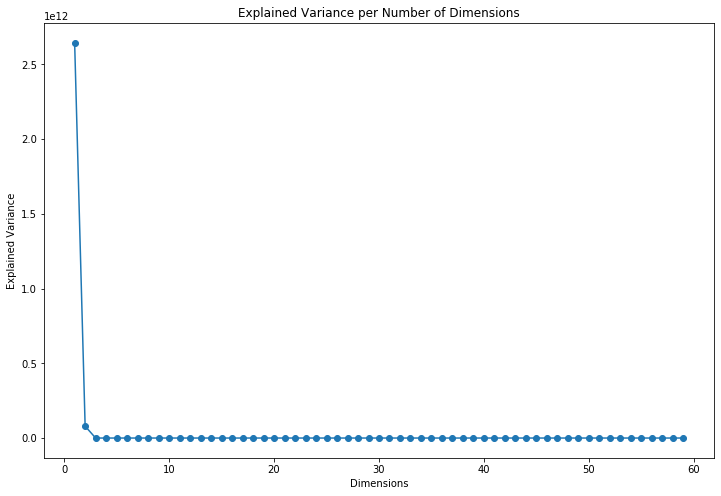

In [24]:
#check optimal number of dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
    
plt.figure(figsize=(12,8))
plt.plot(range(1,60), pca.explained_variance_, '-o')
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.title('Explained Variance per Number of Dimensions')

In [25]:
#reduce the dimensions to 3
pca = PCA(n_components=3)
pca_X = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_X)
pca_df['extra_column'] = 1
pca_df.head()

,0,1,2,extra_column
0,-65458.380223,-1989.900398,-106.829614,1
1,-24822.452565,-2183.262651,-91.929536,1
2,-3611.342800,-2481.291387,-103.983007,1
3,-60174.302267,-1686.547933,-105.840673,1
4,-39670.229427,-1974.642492,-92.892441,1


In [26]:
#resplit into training and testing with reduced X features
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_df, y_classification, 
                                                                    test_size=0.2, random_state=42)
print('done')

done


In [27]:
#instantiate the classifier
logreg3 = LogisticRegression()

# Fit the model on the training data.
%time logreg3.fit(pca_X_train, pca_y_train)

# accuracy score for training
train_accuracy = logreg3.score(pca_X_train, pca_y_train)

# accuracy score for test set
test_accuracy = logreg3.score(pca_X_test, pca_y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 1.73 s, sys: 75.6 ms, total: 1.81 s
Wall time: 1.85 s
Training set score is 0.8570823828226053
Test set score is 0.8576304897059615


In [28]:
#statsmodels table
logreg_model = sm.Logit(pca_y_train, pca_X_train)
%time result = logreg_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 13
CPU times: user 427 ms, sys: 51.7 ms, total: 478 ms
Wall time: 307 ms
                           Logit Regression Results                           
Dep. Variable:                   rate   No. Observations:               297647
Model:                          Logit   Df Residuals:                   297643
Method:                           MLE   Df Model:                            3
Date:                Thu, 14 May 2020   Pseudo R-squ.:                    -inf
Time:                        14:37:25   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                   -1.9433e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
0               -0.0001   8.24e-07   -

### Different function for grid search

In [29]:
# TODO: Import 'r2_score'
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
def fit_model_LR(X, y):
 
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 0)

    #  Create a logistic regression object
    regressor = LogisticRegression()

    #  Create a dictionary for the parameter 'C' 
    params = {"C":[100, 10, 1.0, 0.1, 0.01]}

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #  Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

%time result = fit_model_LR(X_train, y_train)
print(result)

CPU times: user 1min 39s, sys: 4.82 s, total: 1min 44s
Wall time: 1min 40s
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


### Logistic Regression with Scaled Data

In [30]:
#scale so that data has a mean of 0 and a std deviation of 1

from sklearn.preprocessing import scale
from scipy.stats import boxcox
#data = boxcox(data, 0)
X_scaled = scale(X[['usd_goal_real', 'launchyear', 'launchmonth', 'launchday', 
                                           'deadlineyear', 'deadlinemonth', 'deadlineday', 'duration', 
                                           'main_category_Comics', 'main_category_Dance', 'main_category_Design', 
                                           'main_category_Fashion', 'main_category_Film & Video', 
                                           'main_category_Food', 'main_category_Games', 'main_category_Journalism', 
                                           'main_category_Music', 'main_category_Photography', 
                                           'main_category_Publishing', 'main_category_Technology', 
                                           'main_category_Theater', 'country_AU', 'country_BE', 'country_CA', 
                                           'country_CH', 'country_DE', 'country_ES', 'country_GB', 'country_HK', 
                                           'country_IE', 'country_IT', 'country_MX', 'country_NL', 'country_NO', 
                                           'country_NZ', 'country_SE', 'extra_column']].values) 
X_scaled[0]

array([-0.03838225,  0.40543005,  0.47517919, -0.48752001,  0.37348376,
        0.97445047, -0.69583   ,  1.94043606, -0.17243253, -0.10089066,
       -0.29486388, -0.25407801, -0.44874095, -0.26501504, -0.32193113,
       -0.11339065, -0.39058912, -0.17232507,  2.9190219 , -0.30772855,
       -0.17347924, -0.14603567, -0.04035758, -0.20227143, -0.04482284,
       -0.10550618, -0.07754671,  3.18462339, -0.03961584, -0.04642015,
       -0.08711034, -0.06664065, -0.08759456, -0.04341622, -0.06224594,
       -0.06848732,  0.        ])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)


%time result = fit_model_LR(X_train, y_train)
print(result)

CPU times: user 2min 46s, sys: 3.27 s, total: 2min 50s
Wall time: 2min 53s
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [32]:
#instantiate the classifier
logreg = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Fit the model on the training data.
%time logreg.fit(X_train, y_train)

# accuracy score for training
train_accuracy = logreg.score(X_train, y_train)

# accuracy score for test set
test_accuracy = logreg.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 9.72 s, sys: 171 ms, total: 9.89 s
Wall time: 9.92 s
Training set score is 0.6700789861816179
Test set score is 0.6677417620813847


### Logistic Regression with normalized data

In [33]:
#try box-cox set to 0 to apply log transform to data with exponential distribution
#convert the data to normal distribution in each column, lambda value = 0 is for a log transform

data = boxcox(X[['usd_goal_real', 'launchyear', 'launchmonth', 'launchday', 
                                           'deadlineyear', 'deadlinemonth', 'deadlineday']].values, 0)

data[0]

array([7.33560139, 7.60837447, 2.07944154, 2.39789527, 7.60837447,
       2.30258509, 2.19722458])

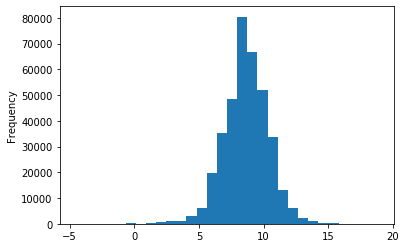

In [34]:
data1 = pd.DataFrame(data=data)
data1[0].plot(kind='hist', bins=30)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data, y_classification, test_size=0.2, random_state=42)


%time result = fit_model_LR(X_train, y_train)
print(result)

CPU times: user 19.2 s, sys: 559 ms, total: 19.8 s
Wall time: 15.4 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [36]:
#instantiate the classifier
logreg = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Fit the model on the training data.
%time logreg.fit(X_train, y_train)

# accuracy score for training
train_accuracy = logreg.score(X_train, y_train)

# accuracy score for test set
test_accuracy = logreg.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 859 ms, sys: 32.2 ms, total: 891 ms
Wall time: 946 ms
Training set score is 0.6432855026255934
Test set score is 0.639923668225555


## Random Forest

### Random Forest with Default Parameters

In [37]:
#import RF
from sklearn.ensemble import RandomForestClassifier

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

#instantiate the classifier
rf1 = RandomForestClassifier()

# Fit the model on the training data.
%time rf1.fit(X_train, y_train)

# accuracy score for training
train_accuracy = rf1.score(X_train, y_train)

# accuracy score for test set
test_accuracy = rf1.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 9.42 s, sys: 237 ms, total: 9.65 s
Wall time: 7.78 s
Training set score is 0.995195651224437
Test set score is 0.9230769230769231


This model seems overfit.

### Random Forest with Dimensionality Reduction

In [38]:
#instantiate the classifier
rf2 = RandomForestClassifier()

# Fit the model on the training data.
%time rf2.fit(pca_X_train, pca_y_train)

# accuracy score for training
train_accuracy = rf2.score(pca_X_train, pca_y_train)

# accuracy score for test set
test_accuracy = rf2.score(pca_X_test, pca_y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 7.29 s, sys: 115 ms, total: 7.41 s
Wall time: 5.26 s
Training set score is 0.9843909060061079
Test set score is 0.8992501209482342


### Random Forest with Tuned Parameters

In [39]:
# #set grid of parameters to test
# param_grid = {
#     'max_depth': [2, 3, 5],
# #     'n_estimators': [70, 100, 120]
#     'n_estimators': [120, 130, 140]
# }

# # Create a based model
# rf = RandomForestClassifier()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
# #fit the model
# grid_search.fit(X_train, y_train)
# #show best parameters
# grid_search.best_params_

#best params are max_depth=5 and n_estimators=120

In [40]:
#instantiate the classifier
rf3 = RandomForestClassifier(max_depth=5, n_estimators=120)

# Fit the model on the training data.
%time rf3.fit(X_train, y_train)

# accuracy score for training
train_accuracy = rf3.score(X_train, y_train)

# accuracy score for test set
test_accuracy = rf3.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 41.8 s, sys: 683 ms, total: 42.5 s
Wall time: 22.8 s
Training set score is 0.8765719123659906
Test set score is 0.8732596892974251


In [41]:
from sklearn.metrics import accuracy_score
    
def performance_metric_accuracy(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

def fit_model_RF(X, y):
 
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 0)

    #  Create a logistic regression object
    regressor = RandomForestClassifier()

    #  Create a dictionary for the parameters 
    params = {'max_depth': [2, 3, 5], 'n_estimators': [100, 120, 140]}
    
    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric_accuracy)

    #  Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

%time result = fit_model_RF(X_train, y_train)
print(result)

CPU times: user 10min 54s, sys: 19.8 s, total: 11min 14s
Wall time: 11min 16s
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [42]:
#instantiate the classifier
rf4 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Fit the model on the training data.
%time rf4.fit(X_train, y_train)

# accuracy score for training
train_accuracy = rf4.score(X_train, y_train)

# accuracy score for test set
test_accuracy = rf4.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 48.7 s, sys: 760 ms, total: 49.4 s
Wall time: 26.3 s
Training set score is 0.8753389081697447
Test set score is 0.8728296511315379


### Random Forest with balanced data

In [43]:
#rf with class_weight altered

#instantiate the classifier
rf4 = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Fit the model on the training data.
%time rf4.fit(X_train, y_train)

# accuracy score for training
train_accuracy = rf4.score(X_train, y_train)

# accuracy score for test set
test_accuracy = rf4.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 54.2 s, sys: 1.05 s, total: 55.2 s
Wall time: 32.5 s
Training set score is 0.8797232963880033
Test set score is 0.8794549266247379


## Decision Tree

### Decision Tree with default parameters

In [44]:
#decision tree with defaults

from sklearn.tree import DecisionTreeClassifier

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

#instantiate the classifier
dt1 = DecisionTreeClassifier()

# Fit the model on the training data.
%time dt1.fit(X_train, y_train)

# accuracy score for training
train_accuracy = dt1.score(X_train, y_train)

# accuracy score for test set
test_accuracy = dt1.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 7.15 s, sys: 211 ms, total: 7.36 s
Wall time: 7.92 s
Training set score is 0.9999428853642066
Test set score is 0.8969924205773262


### Decision Tree with cross validation and hyperparameter tuning

In [45]:
# Decision tree with cross validation and tuning, performance metric is accuracy score

def performance_metric_accuracy(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

def fit_model_DT(X, y):
 
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 0)

    #  Create a logistic regression object
    regressor = DecisionTreeClassifier()

    #  Create a dictionary for the parameters 
    params = {'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7]}
    
    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric_accuracy)

    #  Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

%time result = fit_model_DT(X_train, y_train)
print(result)

CPU times: user 3min 39s, sys: 15.7 s, total: 3min 55s
Wall time: 3min 25s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [46]:
#decision tree with the parameters tuned first try
# from params = {'max_depth': [2, 3, 5], 'min_samples_leaf': [1, 5, 10], 'min_samples_split': [5, 10, 20, 50]}
#it chose max_depth=5, min_samples_leaf=1, min_samples_split=5,

#instantiate the classifier
dt2 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Fit the model on the training data.
%time dt2.fit(X_train, y_train)

# accuracy score for training
train_accuracy = dt2.score(X_train, y_train)

# accuracy score for test set
test_accuracy = dt2.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 2.53 s, sys: 61.5 ms, total: 2.59 s
Wall time: 2.27 s
Training set score is 0.9288452428547911
Test set score is 0.9247164435843681


In [47]:
#decision tree with the parameters tuned second try
# from params = {'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7]}
#it chose max_depth=7, min_samples_leaf=2, min_samples_split=5,

#instantiate the classifier
dt3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Fit the model on the training data.
%time dt3.fit(X_train, y_train)

# accuracy score for training
train_accuracy = dt3.score(X_train, y_train)

# accuracy score for test set
test_accuracy = dt3.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 2.63 s, sys: 88.7 ms, total: 2.71 s
Wall time: 2.37 s
Training set score is 0.9288452428547911
Test set score is 0.9247164435843681


### Decision tree with data balanced

In [48]:
#try decision tree one more time with class_weight=balanced

#instantiate the classifier
dt3 = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Fit the model on the training data.
%time dt3.fit(X_train, y_train)

# accuracy score for training
train_accuracy = dt3.score(X_train, y_train)

# accuracy score for test set
test_accuracy = dt3.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))


CPU times: user 2.92 s, sys: 86.3 ms, total: 3.01 s
Wall time: 2.6 s
Training set score is 0.9261776533947932
Test set score is 0.9226200075256679


### Decision Tree plot

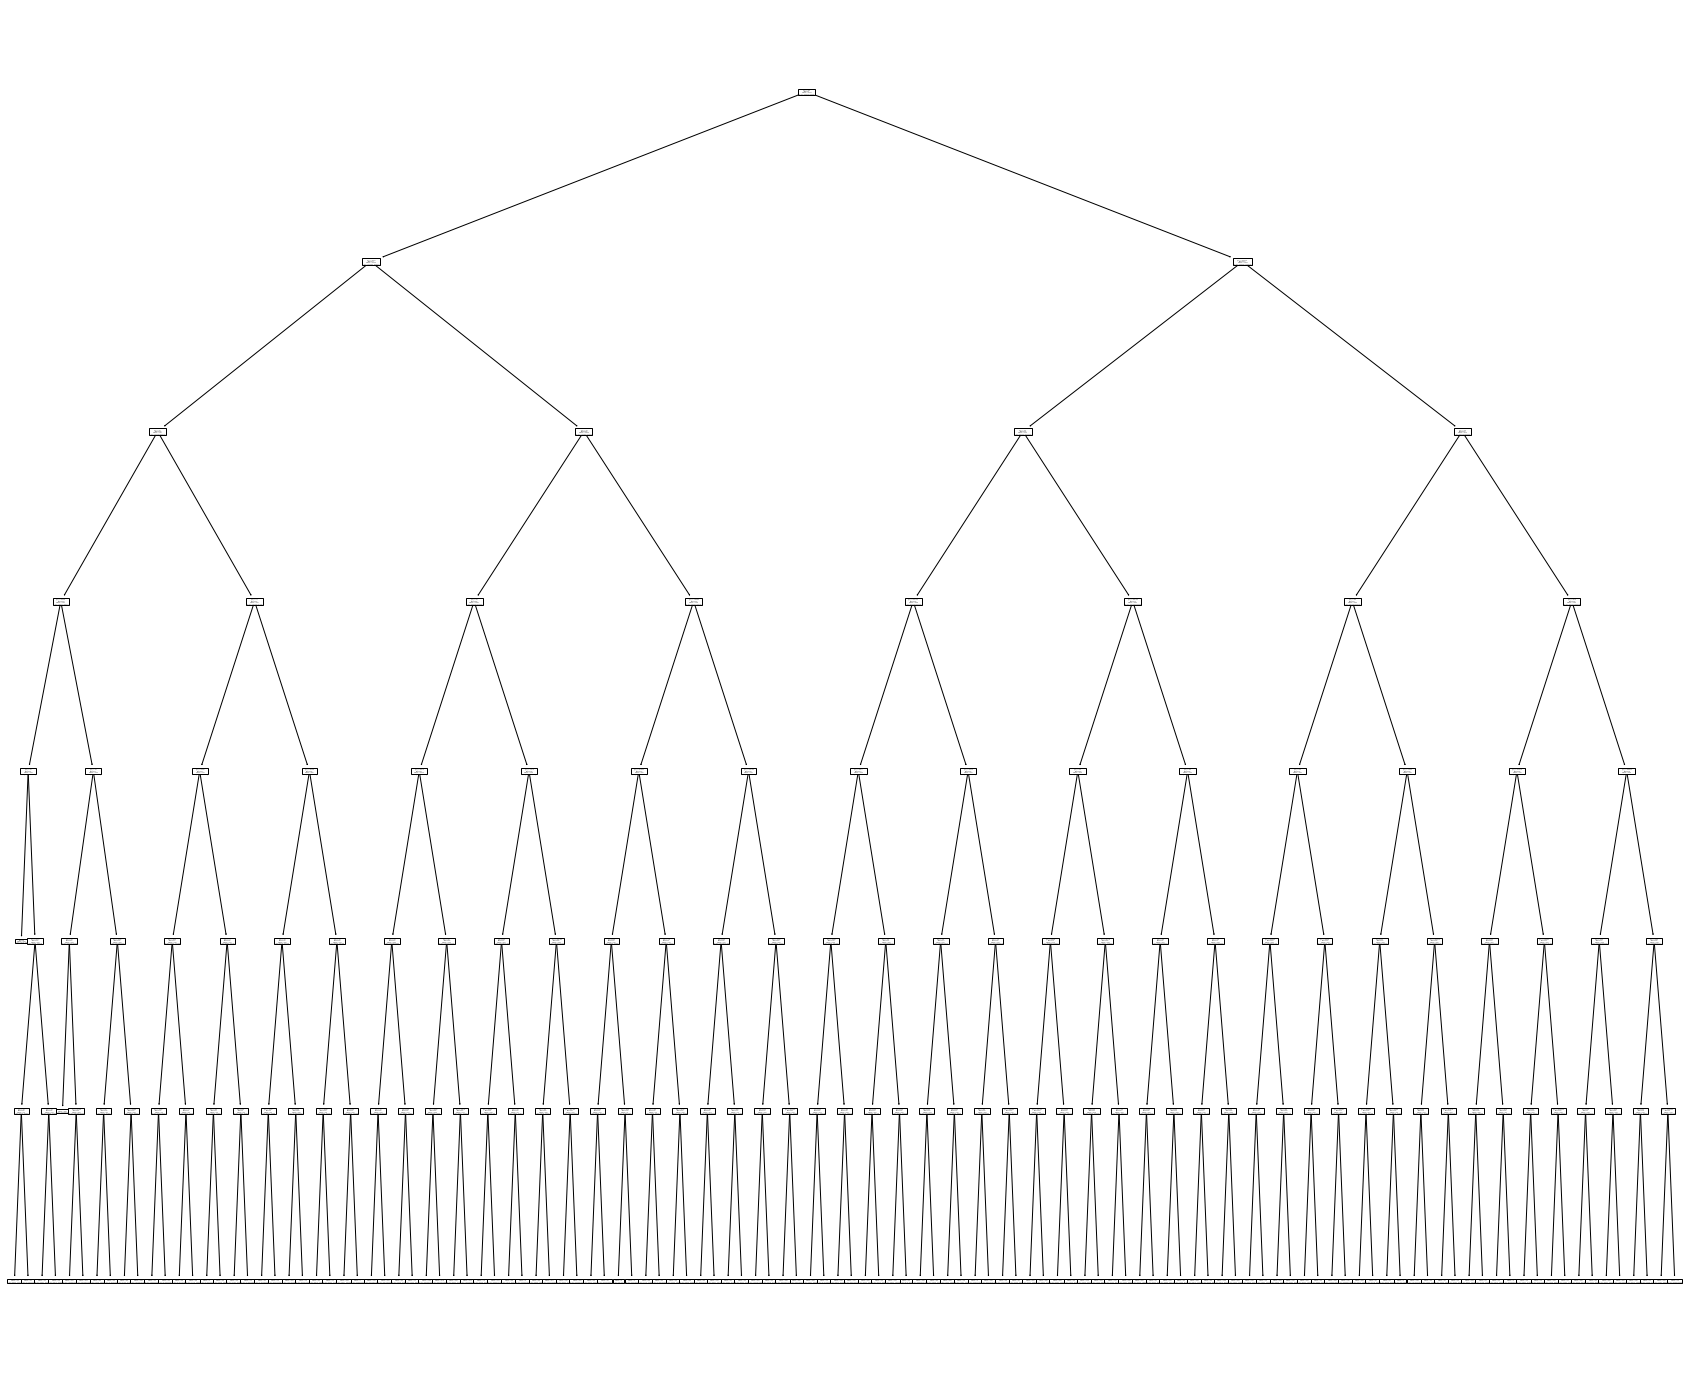

In [49]:
from sklearn.tree import plot_tree

fig = dt3.fit(X_train, y_train)
plt.figure(figsize=(30,25))
plot_tree(fig)
plt.show()

### Plot of Feature Importances

In [50]:
dt3.feature_importances_

array([5.98164651e-04, 1.69764223e-01, 8.17368462e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.76501924e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.07586745e-04, 0.00000000e+00, 1.53211770e-03,
       0.00000000e+00, 9.85294451e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

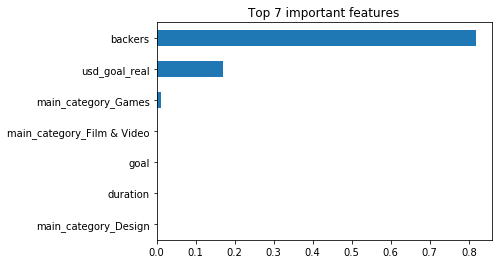

In [51]:
feat_importances = pd.Series(dt3.feature_importances_, index=X.columns)
feat_importances.nlargest(7).sort_values(ascending=True).plot(kind='barh')
plt.title("Top 7 important features")
plt.show()

### Decision Tree with Backers column removed

In [52]:
#decision tree no backers column

#remove backers columm

X_nobackers = X.drop(['backers'], axis=1)

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X_nobackers, y_classification, test_size=0.2, random_state=42)

#instantiate the classifier
dt4 = DecisionTreeClassifier()

# Fit the model on the training data.
%time dt4.fit(X_train, y_train)

# accuracy score for training
train_accuracy = dt4.score(X_train, y_train)

# accuracy score for test set
test_accuracy = dt4.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 6.18 s, sys: 122 ms, total: 6.3 s
Wall time: 6.02 s
Training set score is 0.9881772703907649
Test set score is 0.6023893995592109


In [53]:
def performance_metric_accuracy(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

def fit_model_DT(X, y):
 
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 0)

    #  Create a logistic regression object
    regressor = DecisionTreeClassifier()

    #  Create a dictionary for the parameters 
    params = {'max_depth': [7, 10, 12], 'min_samples_leaf': [5, 7, 9], 'min_samples_split': [2, 3, 5]}
    
    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric_accuracy)

    #  Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

%time result = fit_model_DT(X_train, y_train)
print(result)

CPU times: user 6min 5s, sys: 17.5 s, total: 6min 22s
Wall time: 5min 55s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [54]:
#try decision tree one more time with class_weight=balanced

#instantiate the classifier
dt5 = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Fit the model on the training data.
%time dt5.fit(X_train, y_train)

# accuracy score for training
train_accuracy = dt5.score(X_train, y_train)

# accuracy score for test set
test_accuracy = dt5.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 3.67 s, sys: 70.5 ms, total: 3.75 s
Wall time: 3.39 s
Training set score is 0.6506062550605247
Test set score is 0.6428801806160297


In [55]:
dt5.feature_importances_

array([1.01080303e-01, 3.95224837e-01, 6.80332067e-02, 6.24747605e-03,
       7.68659240e-03, 1.13239824e-02, 6.47771974e-03, 1.02395594e-02,
       2.04042488e-01, 2.37170166e-02, 1.05562048e-03, 1.35162074e-03,
       7.79309979e-03, 1.86602104e-02, 1.16152509e-02, 5.42910658e-03,
       1.09597364e-02, 0.00000000e+00, 3.45657343e-02, 6.15145056e-04,
       1.39186812e-02, 1.85695458e-02, 2.65421962e-02, 1.91672759e-04,
       2.05097387e-05, 2.20742611e-04, 0.00000000e+00, 2.33217995e-04,
       1.67703409e-04, 0.00000000e+00, 2.22388255e-04, 6.53840710e-04,
       0.00000000e+00, 0.00000000e+00, 2.32188977e-04, 0.00000000e+00,
       0.00000000e+00, 8.43823992e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.29605155e-04, 4.69709982e-03,
       8.41439745e-04, 0.00000000e+00, 0.00000000e+00, 1.17754059e-03,
       7.73395807e-04, 3.50460057e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

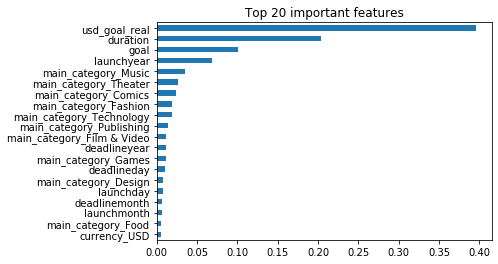

In [56]:
feat_importances_nobackers = pd.Series(dt5.feature_importances_, index=X_nobackers.columns)
feat_importances_nobackers.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title("Top 20 important features")
plt.show()

### Decision Tree with backers column removed and normalized data

In [57]:
#DT with normalized data

data = boxcox(X[['usd_goal_real', 'launchyear', 'launchmonth', 'launchday', 
                                           'deadlineyear', 'deadlinemonth', 'deadlineday']].values, 0)

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(data, y_classification, test_size=0.2, random_state=42)

def fit_model_DT(X, y):
 
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 0)

    #  Create a logistic regression object
    regressor = DecisionTreeClassifier()

    #  Create a dictionary for the parameters 
    params = {'max_depth': [7, 10, 12], 'min_samples_leaf': [7, 10], 'min_samples_split': [3, 5, 7]}
    
    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric_accuracy)

    #  Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

%time result = fit_model_DT(X_train, y_train)
print(result)

CPU times: user 1min 13s, sys: 1.64 s, total: 1min 15s
Wall time: 1min 17s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [58]:
#instantiate the classifier
dt6 = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Fit the model on the training data.
%time dt6.fit(X_train, y_train)

# accuracy score for training
train_accuracy = dt6.score(X_train, y_train)

# accuracy score for test set
test_accuracy = dt6.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 1.27 s, sys: 13.3 ms, total: 1.28 s
Wall time: 1.02 s
Training set score is 0.6165726514965715
Test set score is 0.6133150567112832


In [59]:
dt6.feature_importances_
#usd_goal_real is most important

array([0.77685495, 0.17211366, 0.01871409, 0.00982071, 0.00913363,
       0.00838008, 0.00498288])

## K Nearest Neighbors

### KNN with default parameters

In [60]:
#KNN

# KNN with default parameters, n_neighbors=5, p=2 (euclidean distance), 

from sklearn.neighbors import KNeighborsClassifier

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

#instantiate the classifier
kn1 = KNeighborsClassifier()

# Fit the model on the training data.
%time kn1.fit(X_train, y_train)

# accuracy score for training
train_accuracy = kn1.score(X_train, y_train)

# accuracy score for test set
test_accuracy = kn1.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 6.15 s, sys: 129 ms, total: 6.28 s
Wall time: 6.08 s
Training set score is 0.9315598678972071
Test set score is 0.9045852819437725


### KNN with hyperparameter tuning

In [61]:
#KNN with tuned parameters and cross validation, performance metric is accuracy score

def performance_metric_accuracy(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

def fit_model_KNN(X, y):
 
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 0)

    #  Create a logistic regression object
    regressor = KNeighborsClassifier()

    #  Create a dictionary for the parameters 
    params = {'n_neighbors': [7, 10, 13]}
    
    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric_accuracy)

    #  Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

%time result = fit_model_KNN(X_train, y_train)
print(result)

CPU times: user 5min 58s, sys: 4.38 s, total: 6min 2s
Wall time: 6min 5s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


In [62]:
# KNN with tune parameters, n_neighbors=10

#instantiate the classifier
kn2 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

# Fit the model on the training data.
%time kn2.fit(X_train, y_train)

# accuracy score for training
train_accuracy = kn2.score(X_train, y_train)

# accuracy score for test set
test_accuracy = kn2.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 6.55 s, sys: 169 ms, total: 6.72 s
Wall time: 6.91 s
Training set score is 0.9259794320117455
Test set score is 0.9057141321292265


### KNN with no backers column

In [63]:
#no backers column

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X_nobackers, y_classification, test_size=0.2, random_state=42)

#instantiate the classifier
kn3 = KNeighborsClassifier()

# Fit the model on the training data.
%time kn3.fit(X_train, y_train)

# accuracy score for training
train_accuracy = kn3.score(X_train, y_train)

# accuracy score for test set
test_accuracy = kn3.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 9.76 s, sys: 205 ms, total: 9.96 s
Wall time: 10.6 s
Training set score is 0.7508491602468697
Test set score is 0.6236090953072085


In [64]:
def fit_model_KNN(X, y):
 
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 0)

    #  Create a logistic regression object
    regressor = KNeighborsClassifier()

    #  Create a dictionary for the parameters 
    params = {'n_neighbors': [7, 10, 13]}
    
    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric_accuracy)

    #  Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

%time result = fit_model_KNN(X_train, y_train)
print(result)

CPU times: user 7min 40s, sys: 4.74 s, total: 7min 45s
Wall time: 7min 51s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


In [65]:
#instantiate the classifier
kn4 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

# Fit the model on the training data.
%time kn4.fit(X_train, y_train)

# accuracy score for training
train_accuracy = kn4.score(X_train, y_train)

# accuracy score for test set
test_accuracy = kn4.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 8.38 s, sys: 171 ms, total: 8.55 s
Wall time: 8.44 s
Training set score is 0.7084902585949128
Test set score is 0.6421679299037789


### KNN with no backers column and normalized data

In [66]:
#knn data normalized
from scipy.stats import boxcox
data = boxcox(X[['usd_goal_real', 'launchyear', 'launchmonth', 'launchday', 
                                           'deadlineyear', 'deadlinemonth', 'deadlineday']].values, 0)

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(data, y_classification, test_size=0.2, random_state=42)

def fit_model_KNN(X, y):
 
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 0)

    #  Create a logistic regression object
    regressor = KNeighborsClassifier()

    #  Create a dictionary for the parameters 
    params = {'n_neighbors': [7, 10, 13]}
    
    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric_accuracy)

    #  Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

%time result = fit_model_KNN(X_train, y_train)
print(result)

CPU times: user 1min 14s, sys: 1.12 s, total: 1min 15s
Wall time: 1min 16s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


In [67]:
#instantiate the classifier
kn5 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

# Fit the model on the training data.
%time kn5.fit(X_train, y_train)

# accuracy score for training
train_accuracy = kn5.score(X_train, y_train)

# accuracy score for test set
test_accuracy = kn5.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 903 ms, sys: 15.1 ms, total: 918 ms
Wall time: 726 ms
Training set score is 0.7004471740014178
Test set score is 0.6361877116594098


## Naive Bayes

### Gaussian NB with no adjustments to data

In [68]:
#Naive Bayes
#choosing Gaussian Naive Bayes because it can be used with continuous data. Because it assumes the normal 
#distribution, I suspect I will need to scale the data again, but I will try it as is first.

#Note: multinomial NB is mostly used for text data, bernoulli NB is used when all predictors are boolean.

from sklearn.naive_bayes import GaussianNB

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

#instantiate the classifier
GNB1 = GaussianNB()

# Fit the model on the training data.
%time GNB1.fit(X_train, y_train)

# accuracy score for training
train_accuracy = GNB1.score(X_train, y_train)

# accuracy score for test set
test_accuracy = GNB1.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 802 ms, sys: 227 ms, total: 1.03 s
Wall time: 590 ms
Training set score is 0.41169909322116466
Test set score is 0.4146508627640703


### Gaussian NB with normalized data

In [69]:
#convert the data to normal distribution in each column, lambda value = 0 is for a log transform

data = boxcox(X[['usd_goal_real', 'launchyear', 'launchmonth', 'launchday', 
                                           'deadlineyear', 'deadlinemonth', 'deadlineday']].values, 0)

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(data, y_classification, test_size=0.2, random_state=42)

#instantiate the classifier
GNB2 = GaussianNB()

# Fit the model on the training data.
%time GNB2.fit(X_train, y_train)

# accuracy score for training
train_accuracy = GNB2.score(X_train, y_train)

# accuracy score for test set
test_accuracy = GNB2.score(X_test, y_test)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))

CPU times: user 201 ms, sys: 19.9 ms, total: 221 ms
Wall time: 165 ms
Training set score is 0.646436886647606
Test set score is 0.6430548836209213
